#Multi-Label Classification(Blog Tags Prediction)using NLP
## by Indresh Bhattacharyya

https://medium.com/coinmonks/multi-label-classification-blog-tags-prediction-using-nlp-b0b5ee6686fc

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/learning-stack/Colab-ML-Playbook/blob/master/NLP/Multi-Label%20Classification%20Blog%20Tags%20Prediction/Tag_Prediction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/learning-stack/Colab-ML-Playbook/blob/master/NLP/Multi-Label%20Classification%20Blog%20Tags%20Prediction/Tag_Prediction.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

**The Work Flow goes like this.**
1. Scrape data from web
2. Clean and Preprocess
3. Visualize
4. Classify

**Objective:**

In this project we are going to scrape data from medium and identify the tags given make a Data Frame out of it and in OneHotEncoding format and then.Classify which Blog post Fall under which tags.

Import the needed libraries pandas for Data Frame and urllib3 for connecting to the web and fetching the data. Beautiful Soup is a Python package for parsing HTML and XML documents. It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.

In [0]:
import urllib3
from bs4 import BeautifulSoup

In [0]:
http=urllib3.PoolManager()

Creating empty dataFrame for title and body **column=[‘Title’,’Body’] dfBA=DataFrame(columns=column)**

Also one more for the tags dfT=DataFrame(columns=[0,1,2,3,4])

In [0]:
from pandas import DataFrame
column=['Title','Body']
dfBA=DataFrame(columns=column)
dfT=DataFrame(columns=[0,1,2,3,4])


**CreateDataFrame()** creates the dataframe for **dfDA** and **dfT** respectively for (Title and Body) and (Tags)

In [0]:
def CreateDataFrame(someList):
    t={}
    d={'Title':[someList[0]],'Body':[someList[1]]}
    for n in range(5):
        if len(someList[2])>n:
            t[n]=[someList[2][n]]
        else:
            t[n]=['0']
    toDf=DataFrame(data=d)
    global dfBA,dfT
    #print(dfBA)
    dfBA=dfBA.append(toDf)
    #print(dfBA)
    dfT=dfT.append(DataFrame(data=t))

**CrawlAndFrame()** function in going into every link collected by the spider and from there it collects all the blog **article** and **title** of the blog with the tags involved in the blog and passes them **CreateDataFrame(someList)** which creates a dataframe for the head and article(**dfBA**) and another for the tags(dfT).

Note: As urllib3 is not good at dynamic scraping it will only fetch 7 posts per page. Use selenium for dynamic scraping

In [0]:
def CrawlAndFrame(link):
    print(link)
    blogData=http.request('GET',link)
    soup=BeautifulSoup(blogData.data,'html.parser')
    article=''
    tags=[]
    heading=soup.find('h1').text
    for para in soup.find_all('p'):
        p=para.text
        #p=p.strip('\u')
        article=article+' '+p
    for mtags in soup.find_all('a',{'class':'link u-baseColor--link'}):
        tags.append(mtags.text)
    #CreateDataFrame(list())
    someList=[heading,article,tuple(tags)]
    #print(someList[0])
    CreateDataFrame(someList)

The spider function will go into the web pages and get the links for all the posts in the web page.

In [0]:
def spider(link):
    blogData=http.request('GET',link)
    soup=BeautifulSoup(blogData.data,'html.parser')
    for links in soup.find_all('div',{'class':'postArticle-readMore'}):
        link=links.find('a').get('href')
        CrawlAndFrame(link)

In [7]:
url=['https://medium.com/search?q=machine%20learning','https://medium.com/search?q=deep%20learning']
for x in url:
    spider(x)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.com/@ageitgey/machine-learning-is-fun-80ea3ec3c471?source=search_post---------0


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://becominghuman.ai/cheat-sheets-for-ai-neural-networks-machine-learning-deep-learning-big-data-678c51b4b463?source=search_post---------1


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.freecodecamp.org/every-single-machine-learning-course-on-the-internet-ranked-by-your-reviews-3c4a7b8026c0?source=search_post---------2


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://startupsventurecapital.com/essential-cheat-sheets-for-machine-learning-and-deep-learning-researchers-efb6a8ebd2e5?source=search_post---------3


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://towardsdatascience.com/a-tour-of-the-top-10-algorithms-for-machine-learning-newbies-dde4edffae11?source=search_post---------4


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.mybridge.co/30-amazing-machine-learning-projects-for-the-past-year-v-2018-b853b8621ac7?source=search_post---------5


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78?source=search_post---------6


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721?source=search_post---------7


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://machinelearnings.co/a-humans-guide-to-machine-learning-e179f43b67a0?source=search_post---------8


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.com/@ageitgey/machine-learning-is-fun-part-2-a26a10b68df3?source=search_post---------9


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://becominghuman.ai/cheat-sheets-for-ai-neural-networks-machine-learning-deep-learning-big-data-678c51b4b463?source=search_post---------0


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.freecodecamp.org/want-to-know-how-deep-learning-works-heres-a-quick-guide-for-everyone-1aedeca88076?source=search_post---------1


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://startupsventurecapital.com/essential-cheat-sheets-for-machine-learning-and-deep-learning-researchers-efb6a8ebd2e5?source=search_post---------2


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78?source=search_post---------3
https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721?source=search_post---------4


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.com/basic-income/deep-learning-is-going-to-teach-us-all-the-lesson-of-our-lives-jobs-are-for-machines-7c6442e37a49?source=search_post---------5


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.com/@andrewng/deeplearning-ai-announcing-new-deep-learning-courses-on-coursera-43af0a368116?source=search_post---------6


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


AttributeError: ignored

In [0]:
import pandas as pd

In [0]:
df=pd.concat([dfBA,dfT],axis=1)

In [10]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopWordList=stopwords.words('english')
stopWordList.remove('no')
stopWordList.remove('not')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


This removes every html tags. If there are any. Sometimes even after scraping some tags remain. We are removing that.

In [0]:
def removeTags(data):
    soup=BeautifulSoup(data,'html.parser')
    text=soup.get_text()
    return text
import unicodedata
import spacy
#nlp = spacy.load('en_core', parse=True, tag=True, entity=True)


This function transforms all the accented characters into normal English .

![alt text](https://cdn-images-1.medium.com/max/800/1*OKud8hfMHa_z0Vxa5jZ3rA.jpeg)

In [0]:
def removeAscendingChar(data):
    data=unicodedata.normalize('NFKD', data).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return data


Removes all special characters and digits

In [0]:
def removeCharDigit(text):
    str='`1234567890-=~@#$%^&*()_+[!{;":\'><.,/?"}]'
    for w in text:
        if w in str:
            text=text.replace(w,'')
    return text
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import ToktokTokenizer
lemma=WordNetLemmatizer()
token=ToktokTokenizer()


For grammatical reasons, documents are going to use different forms of a word, such as organize, organizes, and organizing. Additionally, there are families of derivationally related words with similar meanings, such as democracy, democratic, and democratization. In many situations, it seems as if it would be useful for a search for one of these words to return documents that contain another word in the set.

The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance:

am, are, is →be 

car, cars, car’s, cars →car

In [0]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w,'v')
        #print(x)
        listLemma.append(x)
    return text
def stopWordsRemove(text):
    
    wordList=[x.lower().strip() for x in token.tokenize(text)]
    
    removedList=[x for x in wordList if not x in stopWordList]
    text=' '.join(removedList)
    #print(text)
    return text
def PreProcessing(text):
    text=removeTags(text)
    #print(text)
    text=removeCharDigit(text)
    #print(text)
    text=removeAscendingChar(text)
    #print(text)
    text=lemitizeWords(text)
    #print(text)
    text=stopWordsRemove(text)
    #print(text)
    return(text)

Lets visualize:

In [15]:
nltk.download('wordnet')

totalText=''
for x in df['Body']:
    ps=PreProcessing(x)
    totalText=totalText+" "+ps

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


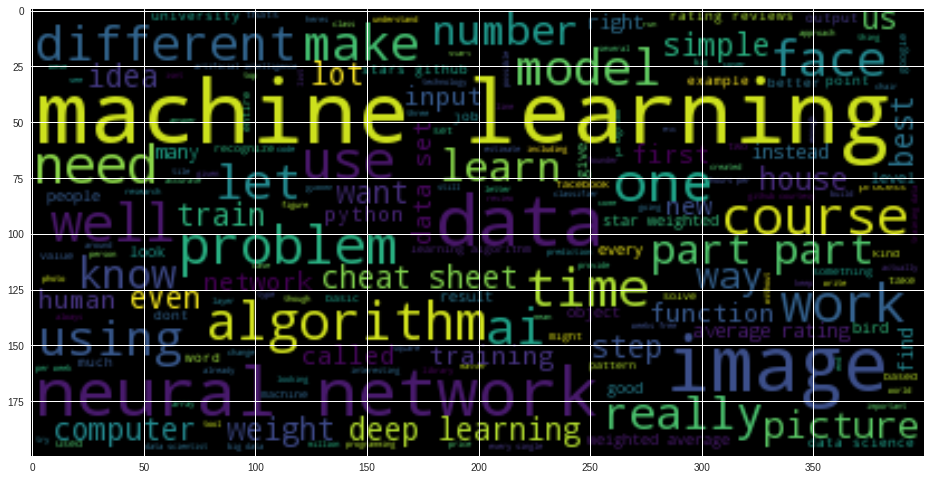

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=60).generate(totalText)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")

What about frequency of the words?

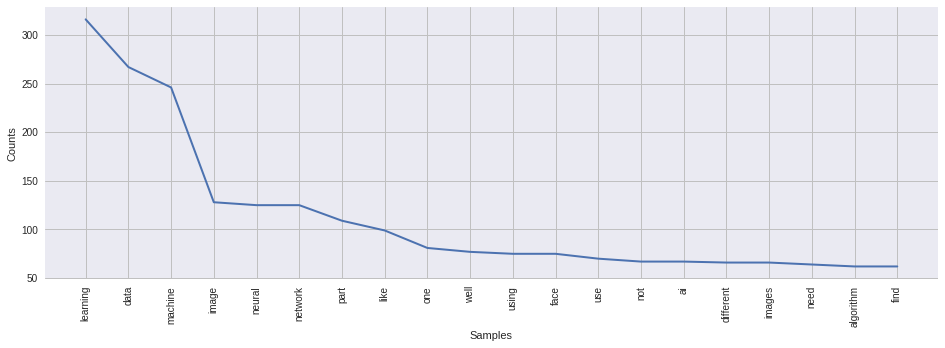

In [17]:
import nltk
freqdist = nltk.FreqDist(token.tokenize(totalText))
freqdist
plt.figure(figsize=(16,5))
freqdist.plot(20)

As you can see the most frequent words in the article is Learning,Data,Machine,ai etc

In [0]:
totalText=''
for x in df['Title']:
    ps=PreProcessing(x)
    totalText=totalText+" "+ps

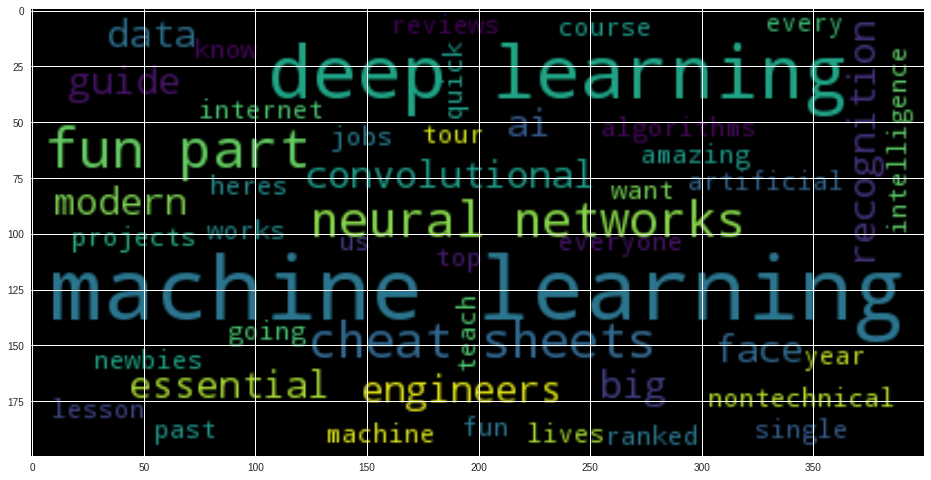

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=60).generate(totalText)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")

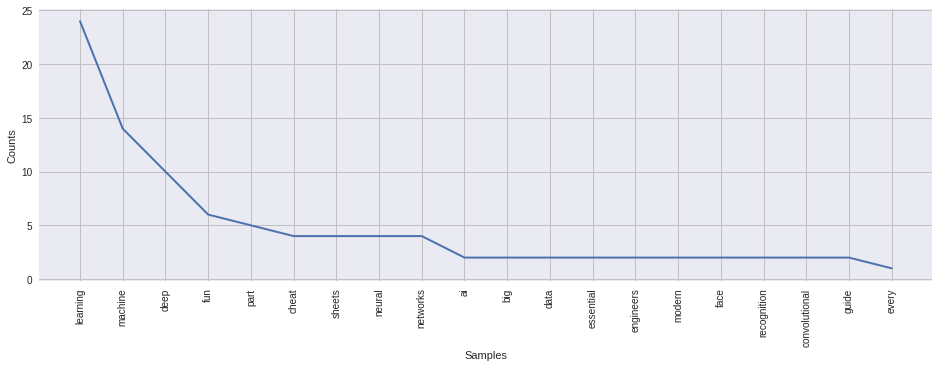

In [20]:
import nltk
freqdist = nltk.FreqDist(token.tokenize(totalText))
freqdist
plt.figure(figsize=(16,5))
freqdist.plot(20)

In [0]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2:-1]


Looking at **dfT** You can probably tell that this is not a optimal way to the tag data. So we need to change it into OneHotEncoding format(**which is basically creating a sparse matrix of 0 and 1 where 1 represents that the index tag is present 0 represents that it doesnt **)

In [0]:
okList=[]
for cl in dfT.columns:
     for n in df[cl]:
            okList.append(n)
okList=list(set(okList))
del(okList[okList.index('0')])

In [23]:
okList

['Algorithms',
 'Startup',
 'Programming',
 'Data Science',
 'Jonathan Sugumar',
 'Deep Learning',
 'Machine Learning',
 'Some rights reserved',
 'Technology',
 'Startups',
 'Nintendo',
 'Neural Networks',
 'Towards Data Science',
 'Big Data',
 'Computer Science',
 'Tech',
 'Artificial Intelligence',
 'Business',
 'Basic Income']

In [0]:
newDF=DataFrame(columns=okList)


In [0]:
for x in range(dfT.count()[0]):
    someDict={}
    for d in okList:
        rowdata=list(dfT.iloc[x])
        if d in rowdata:
            someDict[d]=1
        else:
            someDict[d]=0
    newDF=newDF.append(someDict,ignore_index=True)


In a nutshell what I did here was just taking all the unique tags in the List and made them the columns of my dataFrame and put 1 if that tag is present in the row and 0 if not

In [26]:
newDF

,Algorithms,Startup,Programming,Data Science,Jonathan Sugumar,Deep Learning,Machine Learning,Some rights reserved,Technology,Startups,Nintendo,Neural Networks,Towards Data Science,Big Data,Computer Science,Tech,Artificial Intelligence,Business,Basic Income
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0
2,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0
4,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
6,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0
9,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [0]:
dfBA.index=range(dfBA.count()[0])
df=dfBA.join(newDF)

In [28]:
df

,Body,Title,Algorithms,Startup,Programming,Data Science,Jonathan Sugumar,Deep Learning,Machine Learning,Some rights reserved,...,Startups,Nintendo,Neural Networks,Towards Data Science,Big Data,Computer Science,Tech,Artificial Intelligence,Business,Basic Income
0,Update: This article is part of a series. Che...,Machine Learning is Fun!,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"Over the past few months, I have been collect...","Cheat Sheets for AI, Neural Networks, Machine ...",0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
2,"A year and a half ago, I dropped out of one o...",Every single Machine Learning course on the in...,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,"Machine learning is complex. For newbies, sta...",Essential Cheat Sheets for Machine Learning an...,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
4,"In machine learning, there’s something called...",A Tour of The Top 10 Algorithms for Machine Le...,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,"For the past year, we’ve compared nearly 8,80...",30 Amazing Machine Learning Projects for the P...,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
6,Update: This article is part of a series. Che...,Machine Learning is Fun! Part 4: Modern Face R...,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
7,Update: This article is part of a series. Che...,Machine Learning is Fun! Part 3: Deep Learning...,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
8,"I have a challenge for you. In a few seconds,...",The Non-Technical Guide to Machine Learning & ...,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
9,Update: This article is part of a series. Che...,Machine Learning is Fun! Part 2,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [0]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2:-1].values
# using binary relevance
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
x1=df.Title
x2=df.Body
from pandas import DataFrame
cv=CountVectorizer().fit(x1)
header=DataFrame(cv.transform(x1).todense(),columns=cv.get_feature_names())
cvArticle=CountVectorizer().fit(x2)
article=DataFrame(cvArticle.transform(x2).todense(),columns=cvArticle.get_feature_names())
import pandas as pd
x=pd.concat([header,article],axis=1)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfhead=TfidfTransformer().fit(header)
head=DataFrame(tfidfhead.transform(header).todense())
tfidfart=TfidfTransformer().fit(article)
art=DataFrame(tfidfart.transform(article).todense())
import pandas as pd
x=pd.concat([head,art],axis=1)

**Classification(Training and Testing the model):**

What is binary relevance??

This is the simplest technique, which basically treats each label as a separate single class classification problem.

Say we have x as a independent variable and y1,y2,y3 as the labels of dependent variable . So what binary relevance does is that is it treats each independent variable as a separate class in consideration to the independent variable.

so it maps

x →y1 and x →y2 and x →y3

In [31]:
!pip3 install scikit-multilearn

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
xtrain,xtest,ytrain,ytest=train_test_split(x,y)
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))

predictions = classifier.predict(xtest.astype(float))
predictions.toarray()
from sklearn.metrics import accuracy_score
accuracy_score(ytest.astype(float),predictions)

    100% |████████████████████████████████| 92kB 4.1MB/s 


0.25

**What is classifier chains??**

In this, the first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.

Say we have x as a independent variable and y1,y2,y3 as the labels of dependent variable . So we basically have 3 subsets of classification

x →y1 and x →y1,y2 and x →y1,y2,y3

In [32]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))

# predict
predictions = classifier.predict(xtest.astype(float))

accuracy_score(ytest.astype(float),predictions)

0.25

**What is Label Powerset??**

In this, we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.

In [33]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))
# predict
predictions = classifier.predict(xtest.astype(float))

accuracy_score(ytest.astype(float),predictions)

0.25

**MLkNN:**

Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

For example, multi-label version of kNN is represented by MLkNN.

In [34]:
from skmultilearn.adapt import MLkNN

classifier = MLkNN(k=7)

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))
# predict
predictions = classifier.predict(xtest.astype(float))

accuracy_score(ytest.astype(float),predictions)

0.0

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

classifier=OneVsRestClassifier(MultinomialNB())

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))
# predict
predictions=classifier.predict(xtest.astype(float))

accuracy_score(ytest.astype(float),predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 9 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 12 is present in all training examples.
  str(classes[c]))


0.25